## 🧠 O fenômeno BrainRot
---


#📌 Introdução
Nos últimos anos, o termo "brain rot" (apodrecimento cerebral) ganhou notoriedade ao descrever o impacto negativo do consumo contínuo e fragmentado de conteúdo nas redes sociais — especialmente com a rolagem infinita, vídeos multitela e estímulos de curta duração. Neste projeto, investigamos a relação entre tempo de uso das redes sociais e impactos na saúde mental, cruzando isso com a evolução da adoção tecnológica que tornou esse padrão de comportamento possível.


---
🧪 Dataset 1 — Social Media & Mental Health
Este conjunto, obtido via Kaggle, contém respostas de usuários sobre:

Tempo diário em redes sociais

Emoções e sintomas relacionados (depressão, ansiedade, insônia)

Fatores como gênero, idade, comparação social e distração

---

📈 Dataset 2 — Adoção de Tecnologias (Our World in Data)
Analisamos a evolução da adoção de tecnologias que possibilitam o uso constante das redes sociais: computadores, celulares, internet, smartphones e redes sociais.


In [4]:
#bibliotecas essenciais
import pandas as pd

#dataset 1: social media and mental health do kaggkle
df_smmh = pd.read_csv("smmh.csv")
print("Social media and mental health do kaggle")
display(df_smmh.head())

Social media and mental health do kaggle


,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [5]:
#dataset 2: tecnologia nos lares dos EUA (our world in data)
df_tech = pd.read_csv('technology-adoption-by-households-in-the-united-states.csv')
print("Tecnologia nos lares dos EUA")
display(df_tech.head())

Tecnologia nos lares dos EUA


,Entity,Code,Year,Technology Diffusion (Comin and Hobijn (2004) and others)
0,Amazon Prime users,NaN,2014,11.13
1,Amazon Prime users,NaN,2015,17.09
2,Amazon Prime users,NaN,2016,24.58
3,Amazon Prime users,NaN,2017,32.51
4,Amazon Prime users,NaN,2018,36.58


In [9]:
#dataset 3: Pew research - dados qualitativos extraidos manualmente
#Por ser um PDF não é possível carregar como um dataframe diretamente
print("Relatório da Pew Research será carregado separadamente (PDF)")

Relatório da Pew Research será carregado separadamente (PDF)


Etapa de exploração do dataset social media and mental health:

*   quantas linhas e colunas existem
*   Quais colunas possuem dados nulos
*   Tipos de dados de cada coluna



In [18]:
#Descritiva básica
df_smmh.describe()

'''
1 - Moda
2 - media
3 - mediana
4 - desvios padrão
5 - valores mínimos e máximos
6 - colunas numéricas (tempo de uso, nível de ansiedade)
'''

df_smmh.head()
df_smmh.columns
df_smmh.info()

#renomear as colunas
df_smmh.columns = [
    'timestamp',
    'age',
    'gender',
    'relationship_status',
    'occupation_status',
    'organization_type',
    'uses_social_media',
    'social_media_platforms',
    'avg_time_daily',
    'use_without_purpose',
    'distracted_when_busy',
    'restless_without_social',
    'distraction_scale',
    'worry_scale',
    'concentration_difficulty',
    'compare_with_success',
    'feel_about_comparisons',
    'seek_validation',
    'feel_depressed',
    'interest_fluctuation',
    'sleep_issues'
]

#convertendo as faixas de tempo para valores numericos
#mapear as categorias para valores aproximados em horas
tempo_map = {
    'less then an hour': 0.5,
    'Between 1 and 2 hours':  1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 5.5
}

#Criando uma nova coluna com valores numéricos
df_smmh ['avg_time_hours']  = df_smmh['avg_time_daily'].map(tempo_map)

#Verificando
df_smmh[['avg_time_daily', 'avg_time_hours']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 481 non-null    object 
 1   age                       481 non-null    float64
 2   gender                    481 non-null    object 
 3   relationship_status       481 non-null    object 
 4   occupation_status         481 non-null    object 
 5   organization_type         451 non-null    object 
 6   uses_social_media         481 non-null    object 
 7   social_media_platforms    481 non-null    object 
 8   avg_time_daily            481 non-null    object 
 9   use_without_purpose       481 non-null    int64  
 10  distracted_when_busy      481 non-null    int64  
 11  restless_without_social   481 non-null    int64  
 12  distraction_scale         481 non-null    int64  
 13  worry_scale               481 non-null    int64  
 14  concentrat

,avg_time_daily,avg_time_hours
0,Between 2 and 3 hours,2.5
1,More than 5 hours,5.5
2,Between 3 and 4 hours,3.5
3,More than 5 hours,5.5
4,Between 2 and 3 hours,2.5


✅ O que os dados representam (por bloco)


---


🧑‍💼 Perfil do participante
Idade (2. What is your age?)

Gênero (3. Gender)

Status de relacionamento

Ocupação e organização (universitário, etc.)

🌐 Uso de redes sociais
Uso de redes sociais (6. Do you use social media?)

Plataformas mais usadas

Tempo médio diário (8. What is the average time you spend on social media every day?)

Uso sem propósito específico (9. How often do you find yourself using Social media without a specific purpose?)

🧠 Aspectos emocionais e mentais
Sentir-se inquieto sem redes sociais?

Escala de distração (1-5)

Escala de preocupação mental (1-5)

Dificuldade de concentração

Comparações com pessoas de sucesso nas redes (1-5)

Sentimentos sobre essas comparações

Busca por validação nas redes

Frequência com que se sente deprimido

Variação de interesse em atividades

Problemas com sono (escala de 1 a 5)



In [20]:
# Subconjunto de colunas relevantes para correlação
colunas_corr = [
    'avg_time_hours',
    'distraction_scale',
    'worry_scale',
    'concentration_difficulty',
    'compare_with_success',
    'seek_validation',
    'feel_depressed',
    'interest_fluctuation',
    'sleep_issues'
]

# Cálculo da correlação
df_smmh[colunas_corr].corr()

,avg_time_hours,distraction_scale,worry_scale,concentration_difficulty,compare_with_success,seek_validation,feel_depressed,interest_fluctuation,sleep_issues
avg_time_hours,1.000000,0.238827,0.243933,0.213507,0.160924,0.078190,0.243908,0.216746,0.137897
distraction_scale,0.238827,1.000000,0.462673,0.662768,0.286120,0.172585,0.407667,0.479993,0.291147
worry_scale,0.243933,0.462673,1.000000,0.545904,0.414301,0.208847,0.588757,0.430348,0.327367
concentration_difficulty,0.213507,0.662768,0.545904,1.000000,0.371156,0.242035,0.509794,0.503196,0.354676
compare_with_success,0.160924,0.286120,0.414301,0.371156,1.000000,0.417328,0.417801,0.374242,0.193716
seek_validation,0.078190,0.172585,0.208847,0.242035,0.417328,1.000000,0.272125,0.278575,0.128898
feel_depressed,0.243908,0.407667,0.588757,0.509794,0.417801,0.272125,1.000000,0.494976,0.374726
interest_fluctuation,0.216746,0.479993,0.430348,0.503196,0.374242,0.278575,0.494976,1.000000,0.319247
sleep_issues,0.137897,0.291147,0.327367,0.354676,0.193716,0.128898,0.374726,0.319247,1.000000


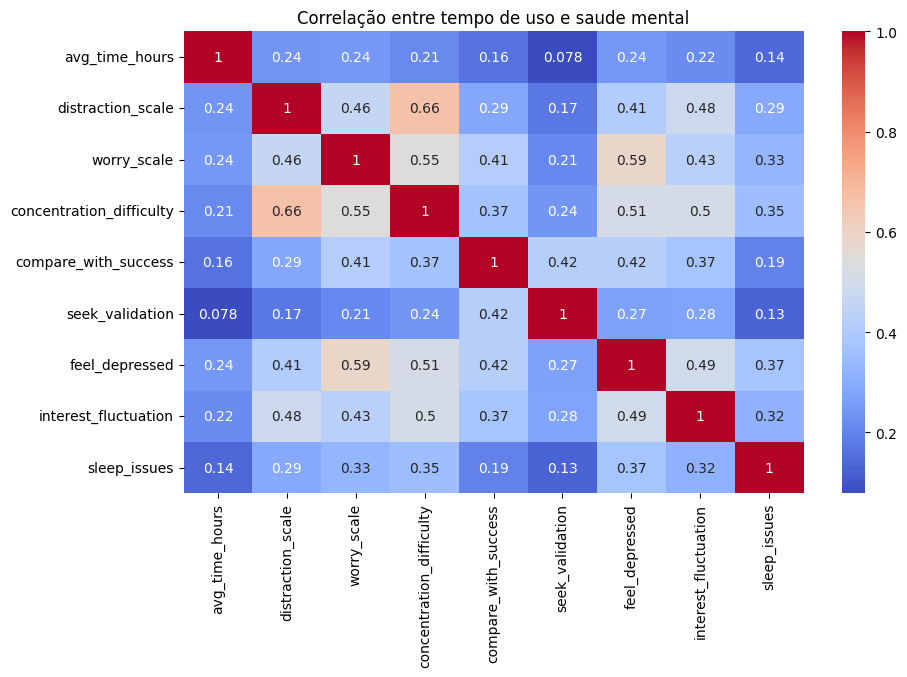

In [21]:
#heatmap de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_smmh[colunas_corr].corr(), annot=True, cmap = 'coolwarm')
plt.title("Correlação entre tempo de uso e saude mental")
plt.show()

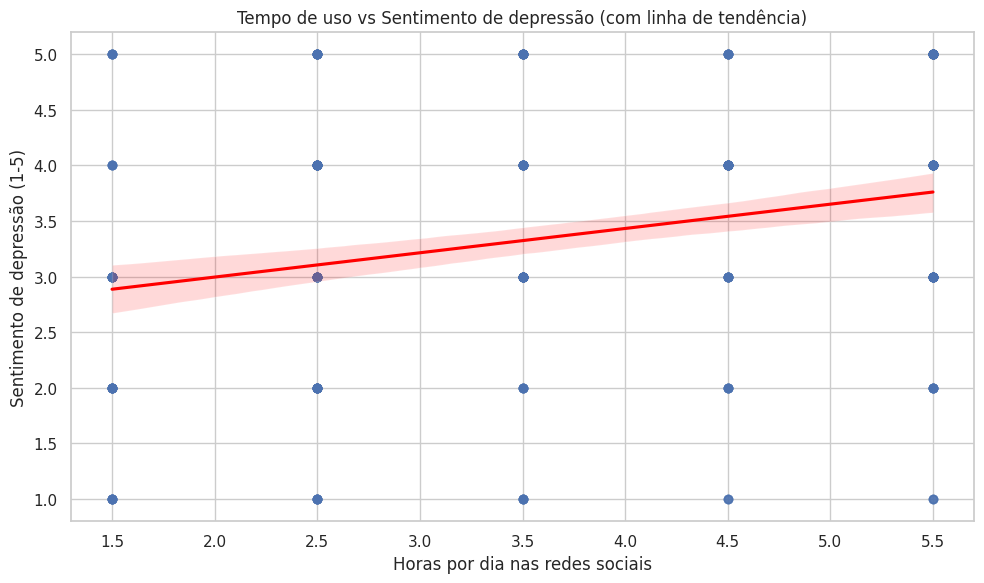

In [70]:
#Grafico: Tempo de uso vs Depressão (linha de tendência e pontos mais sutis)
plt.figure(figsize=(10, 6))
sns.regplot(data=df_smmh, x='avg_time_hours', y='feel_depressed', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("Tempo de uso vs Sentimento de depressão (com linha de tendência)")
plt.xlabel("Horas por dia nas redes sociais")
plt.ylabel("Sentimento de depressão (1-5)")
plt.grid(True)
plt.tight_layout()
plt.show()



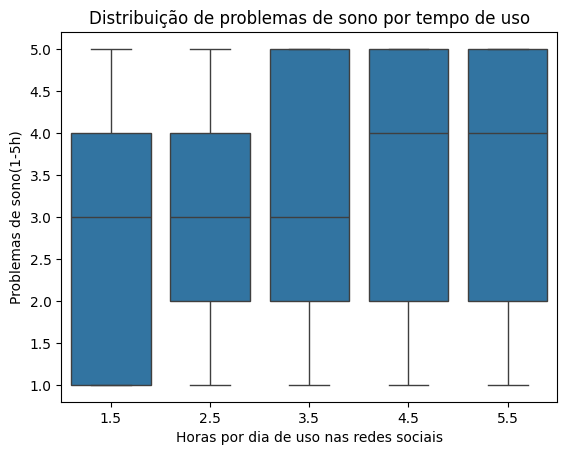

In [24]:
#Boxplot: impacto do uso excessivo
sns.boxplot(data=df_smmh, x='avg_time_hours', y='sleep_issues')
plt.title("Distribuição de problemas de sono por tempo de uso")
plt.xlabel("Horas por dia de uso nas redes sociais")
plt.ylabel("Problemas de sono(1-5h)")
plt.show()

In [28]:
#Categorizar por idade
def categorize_age(age):
  if age <=20:
    return '18-20'
  elif age <=23:
    return '21-23'
  else:
    return '24+'

# aplicando a função para criar a coluna de idades por grupo
df_smmh['age_group'] = df_smmh['age'].apply(categorize_age)

# Calcular contagem dos gurpos separadamente
group_counts = df_smmh.groupby('age_group').size().reset_index(name="quantidade")
print(group_counts)

  age_group  quantidade
0     18-20          96
1     21-23         205
2       24+         180


In [29]:
# Converter tudo para minúsculas e remover espaços
df_smmh['gender_clean'] = df_smmh['gender'].str.lower().str.strip()

# Função para mapear os gêneros
def padronizar_genero_respeitosamente(genero):
    if 'female' in genero:
        return 'Feminino'
    elif 'male' in genero:
        return 'Masculino'
    else:
        return 'Não-binário / Outro'

# Aplicar a função
df_smmh['gender_final'] = df_smmh['gender_clean'].apply(padronizar_genero_respeitosamente)

# Conferir resultado
print(df_smmh['gender_final'].value_counts())

gender_final
Feminino               263
Masculino              211
Não-binário / Outro      7
Name: count, dtype: int64


🎯 1. Tempo de uso vs Sentimento de depressão por gênero

<ipython-input-68-56712b7e00ee>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gênero')


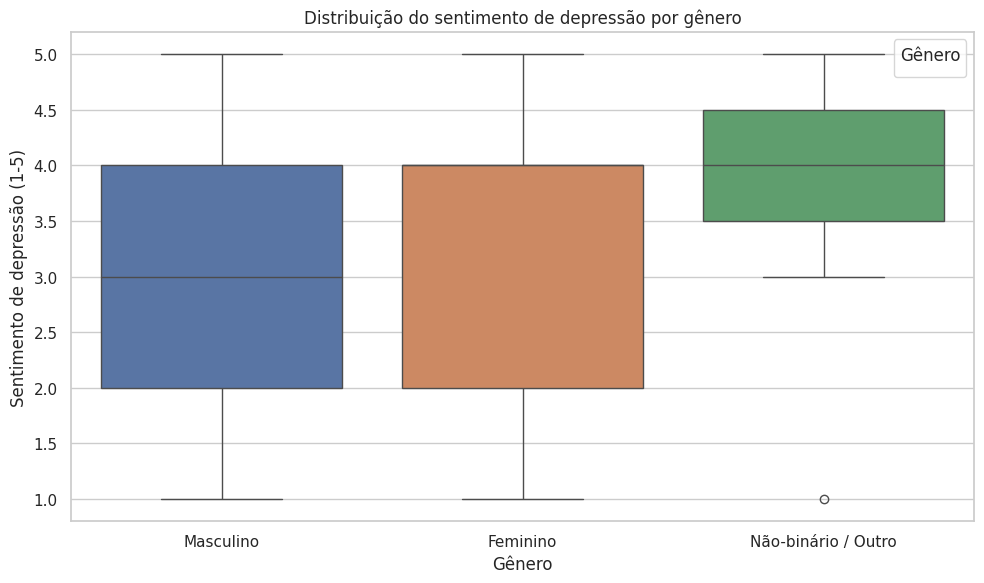

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_smmh, x='gender_final', y='feel_depressed', hue='gender_final')

plt.title("Distribuição do sentimento de depressão por gênero")
plt.xlabel("Gênero")
plt.ylabel("Sentimento de depressão (1-5)")
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()


🎯 2. Problemas de sono por tempo de uso (dividido por gênero)

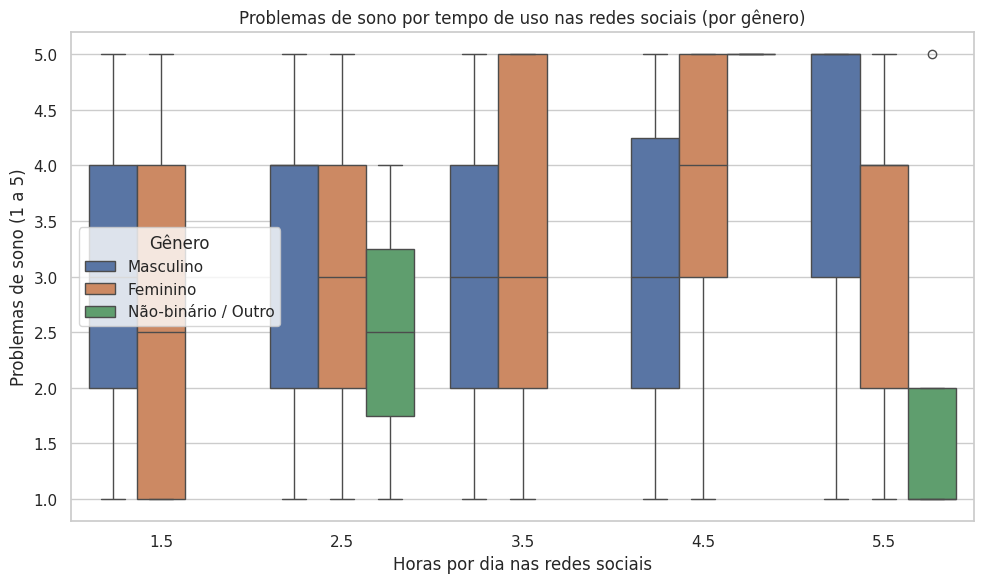

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_smmh, x='avg_time_hours', y='sleep_issues', hue='gender_final')

plt.title('Problemas de sono por tempo de uso nas redes sociais (por gênero)')
plt.xlabel('Horas por dia nas redes sociais')
plt.ylabel('Problemas de sono (1 a 5)')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

Análise do segundo Dataset da Our World in Data

📈 Gráfico: Adoção de tecnologias nos lares

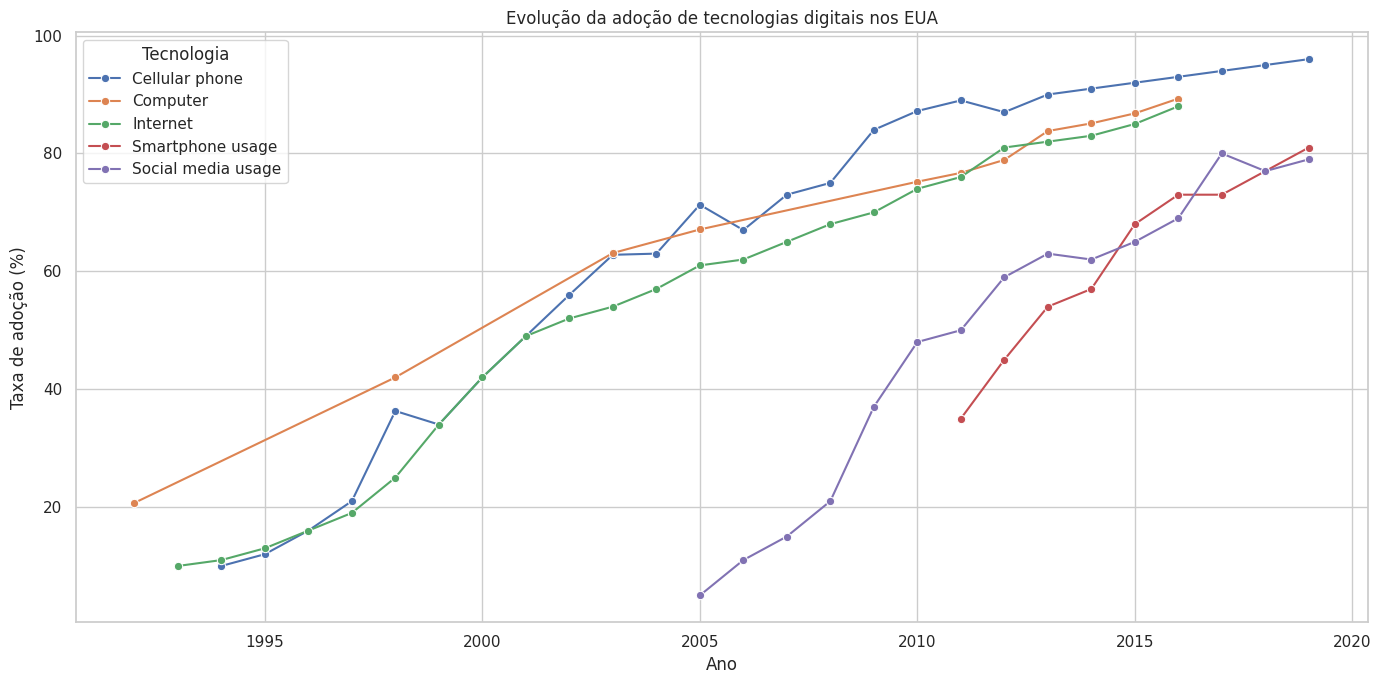

In [65]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o CSV
df_tech = pd.read_csv('technology-adoption-by-households-in-the-united-states.csv')

# Renomear a coluna com os valores de adoção
df_tech.rename(columns={
    'Technology Diffusion (Comin and Hobijn (2004) and others)': 'Adoption'
}, inplace=True)

# Filtrar apenas as tecnologias que queremos analisar
tecnologias_alvo = [
    'Computer',
    'Cellular phone',
    'Internet',
    'Smartphone usage',
    'Social media usage'
]

df_plot = df_tech[df_tech['Entity'].isin(tecnologias_alvo)]

# Plotar gráfico comparativo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_plot, x='Year', y='Adoption', hue='Entity', marker='o')

plt.title('Evolução da adoção de tecnologias digitais nos EUA')
plt.xlabel('Ano')
plt.ylabel('Taxa de adoção (%)')
plt.legend(title='Tecnologia', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
